In [39]:
# Step 1: Load Dataset

import pandas as pd
df = pd.read_csv("S:/Datasets/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [41]:
# Step 2: Basic Data Exploration

# Shape
print(df.shape)

(200, 5)


In [43]:
# Data Types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [45]:
# Check for missing values
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [47]:
# Descriptive stats
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


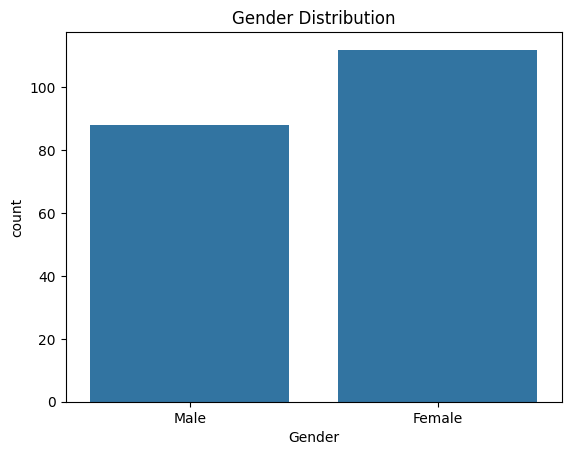

In [55]:
# Step 3: Exploratory Data Analysis (EDA)

# Gender Distribution

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.show()

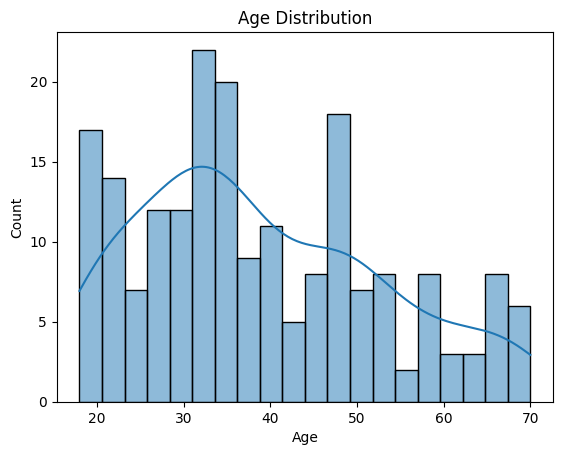

In [57]:
# Age Distribution

sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

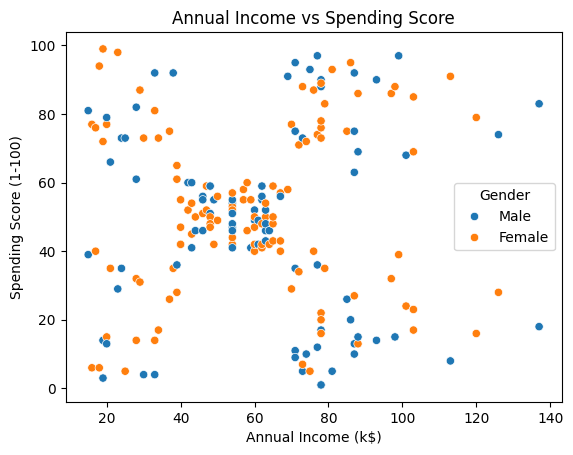

In [59]:
# Income vs Spending

sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title('Annual Income vs Spending Score')
plt.show()

In [67]:
# Step 4: Clustering with K-Means

# Select features for clustering

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

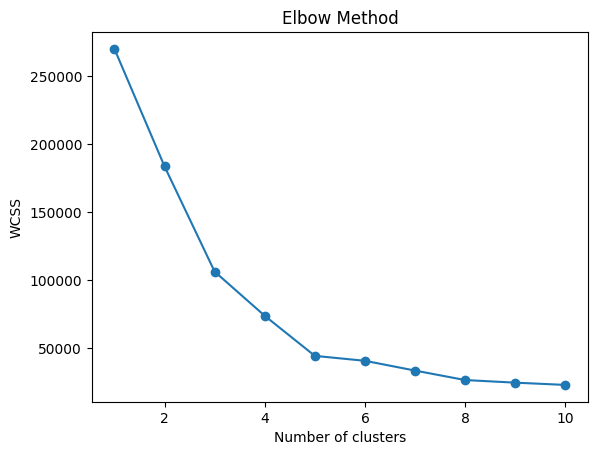

In [69]:
# Find optimal number of clusters using Elbow Method

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [71]:
# Apply KMeans with optimal clusters (e.g., 5)

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

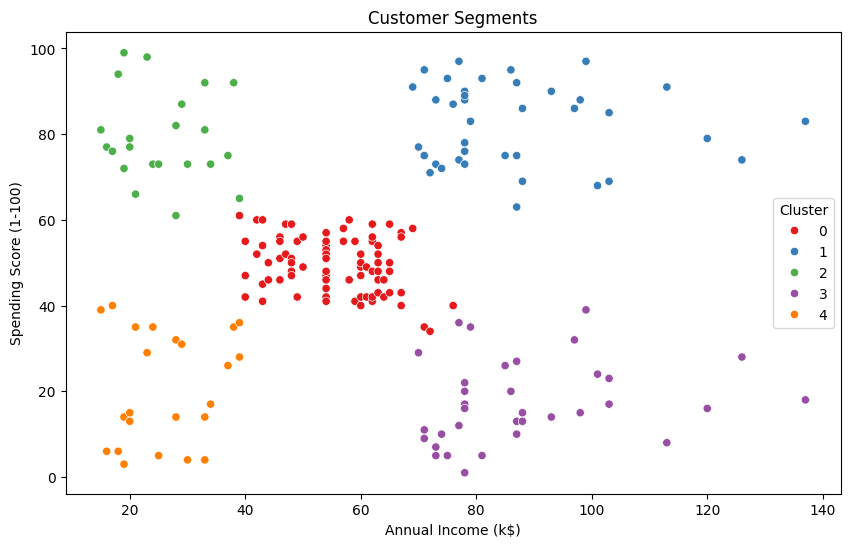

In [73]:
# Step 5: Visualize the Clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1')
plt.title('Customer Segments')
plt.show()

Data Insights & Analysis

Business Objective:

Segment mall customers into distinct groups to help the marketing team better understand their behavior and target them with personalized strategies.

Achievement:

The project successfully segmented mall customers into 5 actionable groups using clustering. These insights can significantly improve marketing focus, customer retention, and campaign design. The clustering technique reveals behavioral patterns that are not obvious from raw data alone.